# Visualização da Informação
## Escola de Matemática Aplicada - Fundação Getúlio Vargas
## Mestrado em Modelagem Matemática

Aluno: Gianlucca Devigili<br>
Github do projeto: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

df = pd.read_csv('world-happiness-report.csv')
df2021 = pd.read_csv('world-happiness-report-2021.csv')

### Data Preparation

In [2]:
# rename columns to make the dfs match
df.rename(columns = {
    'Life Ladder': 'Ladder score'
}, inplace=True)

df2021.rename(columns = {
    'Healthy life expectancy': 'Healthy life expectancy at birth',
    'Logged GDP per capita': 'Log GDP per capita'
}, inplace=True)

# drop columns that aren't in 2021 data
df = df.drop(['Positive affect', 'Negative affect'], axis=1)

# set year of 2021's df
df2021['year'] = 2021

# append 2021 data to df
df = df.append(df2021[df.columns]);

# defines new names for the columns
df.columns = ['country', 'year', 'happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom_of_choiche', 'generosity', 'corruption_perception']

### Exploratory Analysis

In [3]:
df.head()

,country,year,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom_of_choiche,generosity,corruption_perception
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


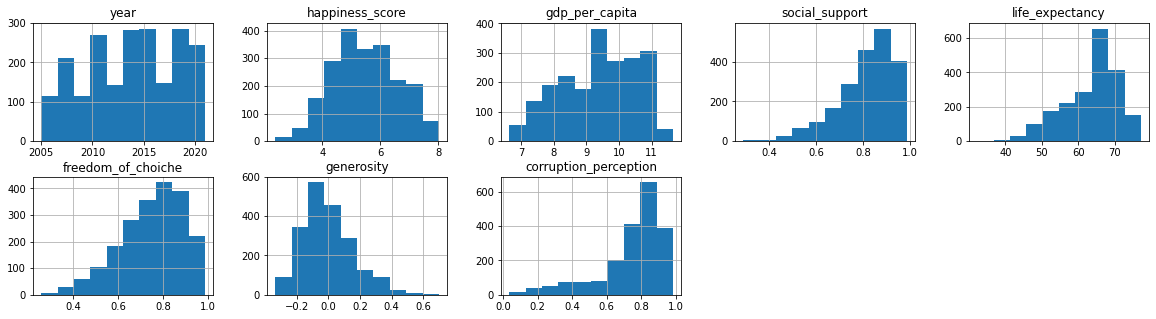

In [4]:
df.hist(figsize=(20, 5), layout=(2, 5));

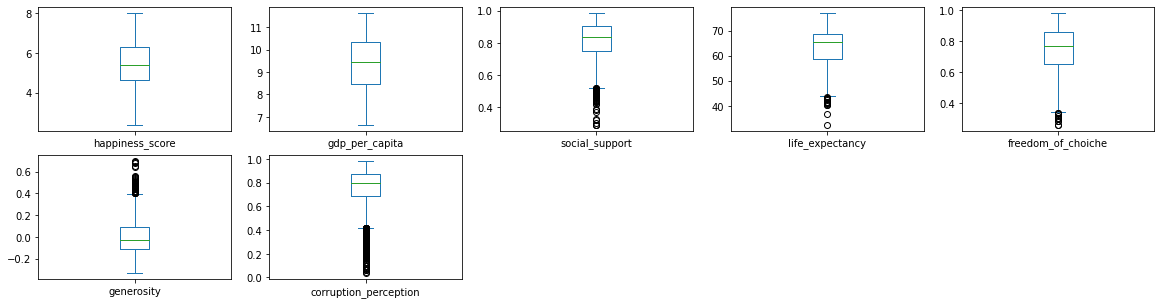

In [5]:
df.loc[:, df.columns != 'year'].plot(kind = 'box', figsize = (20, 5), subplots = True, layout = (2, 5));

In [6]:
px.scatter(x = df['year'], y = df['happiness_score'])